In [8]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split



TASK-1: Data Loading and Preprocessing 

In [9]:
#Loading the dataset and inspecting 

df = pd.read_csv('./WISDM_.csv')
print(df.dtypes)
print(df.isnull().sum()) 

# from the output of the above lines, it shows that only the X , Y ,Z columns have missing values
# and the X,Y columns are numerical hence we can easily replace them with mean or median instead
# of dropping them. For the Z column it would need to be converted to a numerical data type

df['X'] = df['X'].fillna(df['X'].mean())
df['Y'] = df['Y'].fillna(df['Y'].mean())

# there are semicolons at the end of each number in the Z column making
# it invalid for numerical operations. So first we can strip the semicolon 
# then convert to float type and then finally replace the missing values

df['Z'] = df['Z'].str.strip(';')
df['Z'] = df['Z'].astype(float)
df['Z'] = df['Z'].fillna(df['Z'].mean())

# Now standardizing the cols since missing values have been handled

columns = ['X', 'Y', 'Z']

for col in columns:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    




User_ID             int64
Activity_Label     object
Timestamp           int64
X                 float64
Y                 float64
Z                  object
dtype: object
User_ID           0
Activity_Label    0
Timestamp         0
X                 1
Y                 1
Z                 2
dtype: int64


TASK-2: Exploratory Data Analysis (EDA)

C:\Users\All\AppData\Local\Temp\ipykernel_15448\1095960139.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\All\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


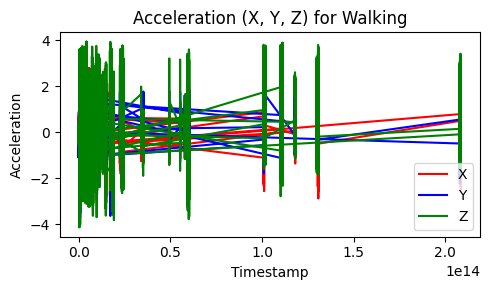

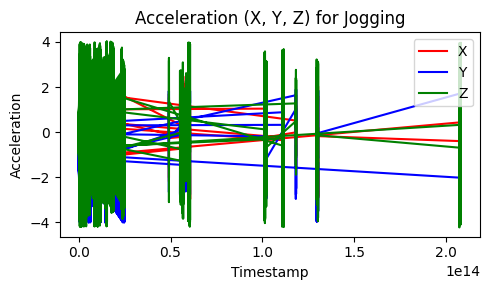

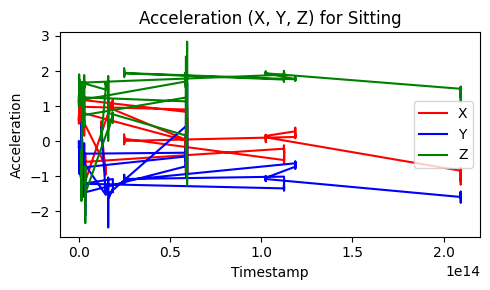

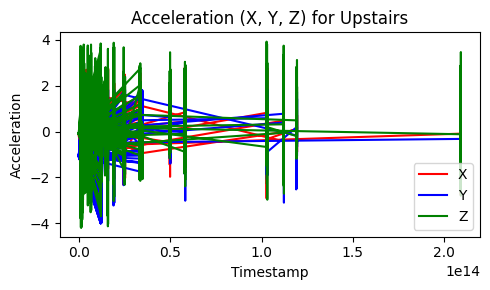

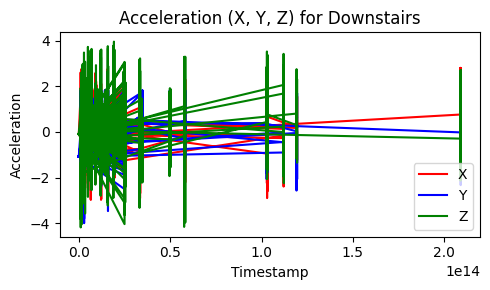

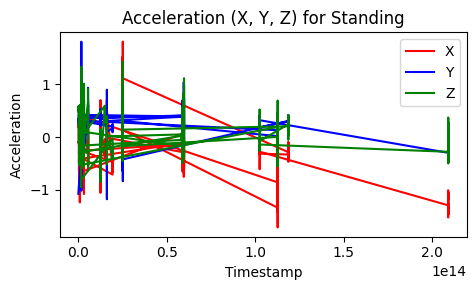

In [10]:

# VISUALISING THE DATA

# function for plotting activities over time
def plot_activity(df, activity):
    
    activity_data = df[df['Activity_Label'] == activity]
        
    plt.figure(figsize=(5, 3))  
    plt.plot(activity_data['Timestamp'], activity_data['X'], label='X', color='red')
    plt.plot(activity_data['Timestamp'], activity_data['Y'], label='Y', color='blue')
    plt.plot(activity_data['Timestamp'], activity_data['Z'], label='Z', color='green')
   
    plt.title(f'Acceleration (X, Y, Z) for {activity}')
    plt.xlabel('Timestamp')
    plt.ylabel('Acceleration')
    plt.legend()
        
    plt.tight_layout()
    plt.show()

# calling the fuunc for each activity
plot_activity(df, 'Walking')  
plot_activity(df, 'Jogging')   
plot_activity(df, 'Sitting')  
plot_activity(df,'Upstairs')
plot_activity(df,'Downstairs')
plot_activity(df,'Standing')




In [11]:
# CALCULATING SUMMARY STATSTICS

grouped = df.groupby('Activity_Label')[['X', 'Y', 'Z']]

mean_stats = grouped.mean()
median_stats = grouped.median()
std_stats = grouped.std()

print("Mean Values for X, Y, Z:")
print(mean_stats)
print("\nMedian Values for X, Y, Z:")
print(median_stats)
print("\nStandard Deviation for X, Y, Z:")
print(std_stats)


Mean Values for X, Y, Z:
                       X         Y         Z
Activity_Label                              
Downstairs     -0.046490  0.200302  0.063484
Jogging        -0.124017 -0.266849 -0.114040
Sitting         0.118514 -0.790884  1.325313
Standing       -0.252420  0.258159  0.051564
Upstairs       -0.027032  0.140912 -0.013348
Walking         0.130226  0.207450 -0.109827

Median Values for X, Y, Z:
                       X         Y         Z
Activity_Label                              
Downstairs     -0.095519  0.191475  0.025297
Jogging        -0.107224 -0.400119 -0.148405
Sitting         0.084455 -0.707808  1.620233
Standing       -0.265250  0.323767  0.065163
Upstairs       -0.073571  0.203367 -0.062761
Walking         0.050801  0.219717 -0.196814

Standard Deviation for X, Y, Z:
                       X         Y         Z
Activity_Label                              
Downstairs      0.713565  0.722713  0.769394
Jogging         1.336284  1.368302  1.226702
Sitting       

In [12]:
# magnitude feauture

df['Magnitude'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)
print(df[['X', 'Y', 'Z', 'Magnitude']].head())

          X         Y         Z  Magnitude
0 -0.208864  0.800988  0.019602   0.828004
1  0.626173  0.590434  0.113572   0.868103
2  0.610229  0.533747 -0.102844   0.817216
3 -0.196906  1.665472  0.546403   1.763838
4 -0.280609  0.715957  1.420608   1.615383


TASK-3 : Model 1 - K-Nearest Neighbors (KNN) Classification 

In [13]:


# 1. Split the Data
X = df[['X', 'Y', 'Z']]  
y = df['Activity_Label']  # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train a KNN Model

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [3, 5, 7, 9, 13]  

results = {}

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train_scaled, y_train)
    
    y_pred = knn.predict(X_test_scaled)
       
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results[k] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall}

for k in k_values:
    print(f"K = {k}:")
    print(f"  Accuracy: {results[k]['Accuracy']:.4f}")
    print(f"  Precision: {results[k]['Precision']:.4f}")
    print(f"  Recall: {results[k]['Recall']:.4f}")
    print("-----------------------------------------------------" )

# from the output below. The best results come for k = 13 


K = 3:
  Accuracy: 0.5588
  Precision: 0.5544
  Recall: 0.5588
-----------------------------------------------------
K = 5:
  Accuracy: 0.5798
  Precision: 0.5575
  Recall: 0.5798
-----------------------------------------------------
K = 7:
  Accuracy: 0.5995
  Precision: 0.5660
  Recall: 0.5995
-----------------------------------------------------
K = 9:
  Accuracy: 0.6099
  Precision: 0.5721
  Recall: 0.6099
-----------------------------------------------------
K = 13:
  Accuracy: 0.6213
  Precision: 0.5795
  Recall: 0.6213
-----------------------------------------------------


TASK-4: Model 2 - K-Means or K-Medoids Clustering  

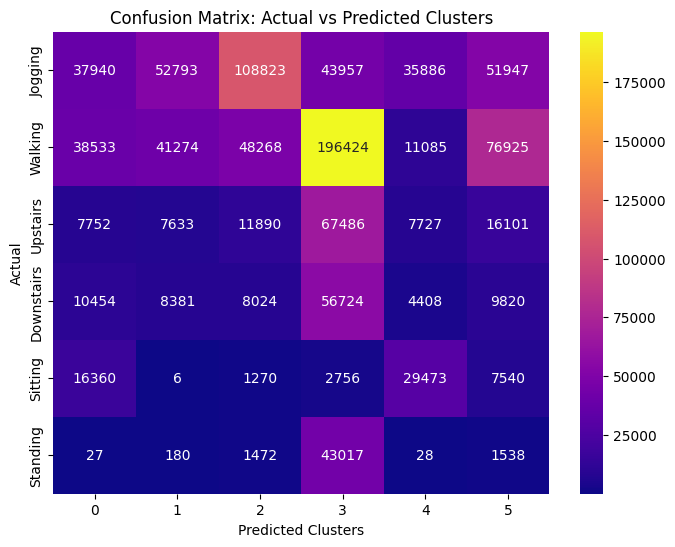

Clusters: 
[[ 0.61711395  0.48218823  1.54000816]
 [-1.1851808   1.01981504 -0.83404759]
 [-0.4393417  -1.24246169 -0.6450121 ]
 [-0.04979692  0.35665764 -0.07625037]
 [-0.75945511 -0.80679342  1.42747944]
 [ 1.39929706 -0.10913081 -0.35784087]]


In [14]:
# using k means :

X = df[['X', 'Y', 'Z']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

label_mapping = {label: idx for idx, label in enumerate(df['Activity_Label'].unique())}
true_labels = df['Activity_Label'].map(label_mapping)
predicted_labels = df['Cluster']

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', xticklabels=range(k), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix: Actual vs Predicted Clusters")
plt.xlabel("Predicted Clusters")
plt.ylabel("Actual")
plt.show()

print("Clusters: ")
print(kmeans.cluster_centers_)


TASK-5: Model 3 - Support Vector Machine (SVM) Classification


In [ ]:

# Prepare data
df['magnitude'] = np.sqrt(df['X']**2 + df['Y']**2 + df['Z']**2)
X = df[['X', 'Y', 'Z', 'magnitude']]
y = df['Activity_Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_svm(kernel, C=1.0, gamma='scale'):
    svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
    print("-" * 50)

kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    evaluate_svm(kernel)

# Hyperparameter tuning for RBF kernel
best_accuracy = 0
for C in [0.1, 1, 10]:
    for gamma in [0.01, 0.1, 1]:
        svm = SVC(kernel='rbf', C=C, gamma=gamma)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {'C': C, 'gamma': gamma}
print("Best RBF kernel parameters:", best_params)
evaluate_svm('rbf', C=best_params['C'], gamma=best_params['gamma'])


TASK-6: Comparison and Reflection

1. Compare All Models:

    Performance Summary:

KNN: Accuracy was moderate or high as it is depending on the choice of k. The model's accuracy improved with optimal k values which i determined through various trials.

K-Means/K-Mediods: Using k-means , the clustering results showed a moderate level of separation between groups according to my choice of k

SVM: Gave the best accuracy among the three model bdcause of its ability to separate classes using hyperplanes, especially with non-linear kernels like RBF


2. Reflection Questions:

○ Which approach do you think is best suited for this dataset and why? 
    SVM is the most suited for this dataset. Reason being its ability to model complex decision boundaries and deliver high accuracy. It was particularly effective at dealing with data that had a non-linear correlation

○ Did the clustering results match your expectations? What challenges did you
face?
     K-Means clustering gave moderately considerable clusters but not perfect because of overlapping data in the data set. Determining the optimal number of clusters was a difficult task and required various trials and errors.

○ How could you improve these models or try other techniques to get better results?
    For KNN and K-means we can improve significantly by gaining an optimal value of k. Other techniques according to my knowledge we can use are Random Forest or Gradient Boosting. Another thing to do can be using dimensionality reduction using PCA which can enhance clustering performacnes in particular.